In [29]:
df = pd.read_csv(r'C:\Users\palak\Desktop\Northeastern\ALY6040_Data_Mining\titanic3.csv')
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [30]:
df['age'] = df['age'].fillna(df['age'].mean())
df['fare'] = df['fare'].fillna(df['fare'].mean())
#df['embarked'] = df['embarked'].fillna(df['embarked'].mode())
#df['embarked'] = df.embarked.fillna(df.embarked.mode[0],inplace = True)
df=df.dropna(subset=['embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1307 non-null   float64
 1   survived   1307 non-null   float64
 2   name       1307 non-null   object 
 3   sex        1307 non-null   object 
 4   age        1307 non-null   float64
 5   sibsp      1307 non-null   float64
 6   parch      1307 non-null   float64
 7   ticket     1307 non-null   object 
 8   fare       1307 non-null   float64
 9   cabin      293 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       484 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  744 non-null    object 
dtypes: float64(7), object(7)
memory usage: 153.2+ KB


In [31]:
df1=df.drop('boat', axis=1)
df1=df1.drop('body', axis=1)
df1=df1.drop('home.dest', axis=1)
df1=df1.drop('cabin', axis=1)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1307 non-null   float64
 1   survived  1307 non-null   float64
 2   name      1307 non-null   object 
 3   sex       1307 non-null   object 
 4   age       1307 non-null   float64
 5   sibsp     1307 non-null   float64
 6   parch     1307 non-null   float64
 7   ticket    1307 non-null   object 
 8   fare      1307 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(6), object(4)
memory usage: 112.3+ KB


In [33]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print(upper_bound)
print(lower_bound)

pclass       4.5000
survived     2.5000
age         54.5000
sibsp        2.5000
parch        0.0000
fare        66.3438
dtype: float64
pclass       0.500
survived    -1.500
age          2.500
sibsp       -1.500
parch        0.000
fare       -27.173
dtype: float64


In [34]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

<ipython-input-34-40a85132028f>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
<ipython-input-34-40a85132028f>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


age          100
boat           0
body           0
cabin          0
embarked       0
fare         169
home.dest      0
name           0
parch        307
pclass         0
sex            0
sibsp         57
survived       0
ticket         0
dtype: int64

In [35]:
df1.to_csv(r'C:\Users\palak\Desktop\Northeastern\ALY6040_Data_Mining\titanicfinal.csv')

C:\Users\palak\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\palak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


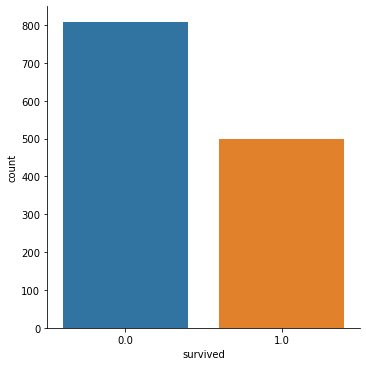

In [39]:
sns.factorplot('survived',data=df1,kind='count')

C:\Users\palak\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\palak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


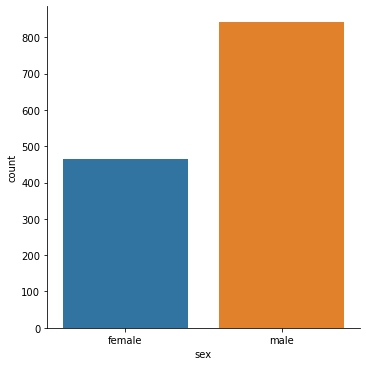

In [36]:
sns.factorplot('sex',data=df1,kind='count')

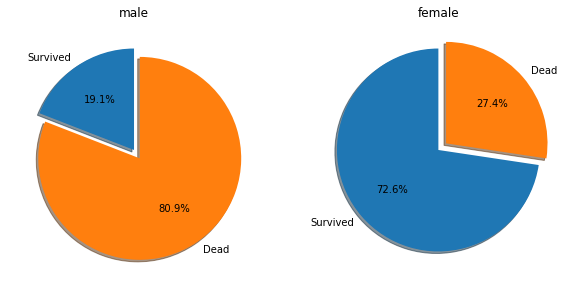

In [60]:
labels = 'Survived', 'Dead'
sizes_male = [len(df.loc[ (df["sex"]=='male') & (df["survived"]==1)]), \
         len(df.loc[ (df["sex"]=='male')& (df["survived"]==0)]) ]
sizes_female = [len(df.loc[ (df["sex"]=='female') & (df["survived"]==1)]), \
         len(df.loc[ (df["sex"]=='female')& (df["survived"]==0)]) ]

explode = (0, 0.1) 

fig = plt.figure()
fig.set_size_inches(10,5)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(sizes_male, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('male')

ax2.pie(sizes_female, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('female')

plt.show()

C:\Users\palak\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\palak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


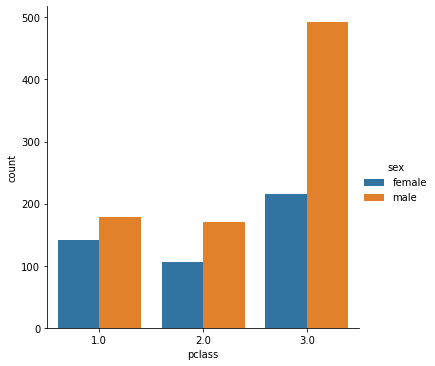

In [38]:
sns.factorplot('pclass',data=df1,hue='sex',kind='count')

C:\Users\palak\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\palak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


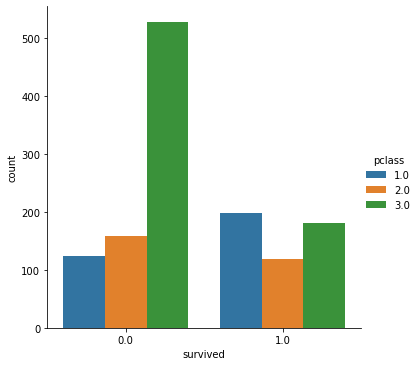

In [40]:
sns.factorplot('survived',data=df1,kind='count',hue='pclass')

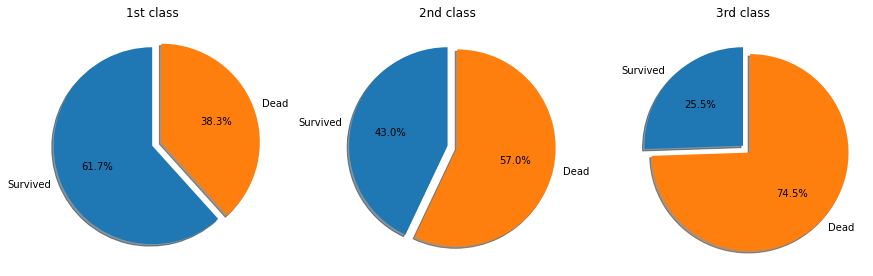

In [61]:
labels = 'Survived', 'Dead'
sizes_1 = [len(df.loc[ (df["pclass"]==1) & (df["survived"]==1)]), \
         len(df.loc[ (df["pclass"]==1)& (df["survived"]==0)]) ]

sizes_2 = [len(df.loc[ (df["pclass"]==2) & (df["survived"]==1)]), \
         len(df.loc[ (df["pclass"]==2)& (df["survived"]==0)]) ]

sizes_3 = [len(df.loc[ (df["pclass"]==3) & (df["survived"]==1)]), \
         len(df.loc[ (df["pclass"]==3)& (df["survived"]==0)]) ]

explode = (0, 0.1)

fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(sizes_1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('1st class')

ax2.pie(sizes_2, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('2nd class')

ax3.pie(sizes_3, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax3.set_title('3rd class')

plt.show()

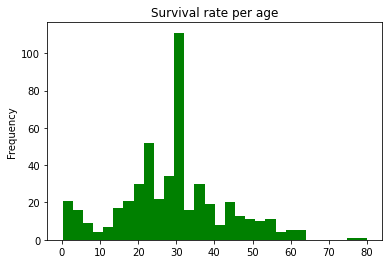

In [63]:
df[df["survived"]==1]["age"].plot.hist(bins=30, color='g')
plt.title('Survival rate per age')
plt.show()

In [41]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.

cols = ['name', 'sex', 'ticket', 'embarked']

for name in cols:
    df1[name] = le.fit_transform(df1[name])

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1307 non-null   float64
 1   survived  1307 non-null   float64
 2   sex       1307 non-null   int32  
 3   age       1307 non-null   float64
 4   sibsp     1307 non-null   float64
 5   parch     1307 non-null   float64
 6   fare      1307 non-null   float64
 7   embarked  1307 non-null   int32  
dtypes: float64(6), int32(2)
memory usage: 114.0 KB


In [42]:
df1=df1.drop('name', axis=1)
df1=df1.drop('ticket',axis=1)

In [43]:
y= df1.survived
x=df1.drop('survived', axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [83]:
#LR
import statsmodels.api as sm
log_reg = sm.Logit(y_train, x_train).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.502566
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1045
Model:                          Logit   Df Residuals:                     1038
Method:                           MLE   Df Model:                            6
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:                  0.2393
Time:                        17:35:48   Log-Likelihood:                -525.18
converged:                       True   LL-Null:                       -690.37
Covariance Type:            nonrobust   LLR p-value:                 2.514e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pclass         0.0838      0.073      1.148      0.251      -0.059       0.227
sex           -2.1909      0.

In [85]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
predict=lr.predict(x_test)

In [86]:
accuracy_score(y_test, predict)

0.7786259541984732

In [87]:
precision_score(y_test, predict)

0.7840909090909091

In [88]:
recall_score(y_test, predict)

0.6388888888888888

In [89]:
mean_squared_error(y_test, predict)

0.22137404580152673

In [90]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,135,19
Actual Yes,39,69


In [44]:
#k=3
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6603053435114504

In [76]:
precision_score(y_test, y_pred)

0.6144578313253012

In [77]:
recall_score(y_test, y_pred)

0.4722222222222222

In [49]:
mse = mean_squared_error(y_test, y_pred)
mse

0.33969465648854963

In [92]:
#k=5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred3 = classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred3)
accuracy

0.683206106870229

In [93]:
precision_score(y_test, y_pred3)

0.6506024096385542

In [94]:
recall_score(y_test, y_pred3)

0.5

In [96]:
mean_squared_error(y_test, y_pred3)

0.31679389312977096

Minimum error:- 0.27099236641221375 at K = 14


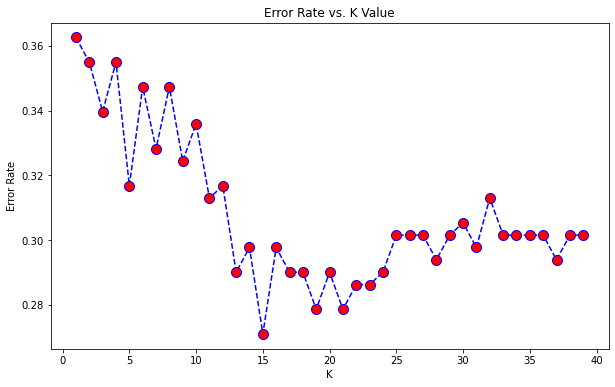

In [97]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


Maximum accuracy:- 0.7290076335877863 at K = 14


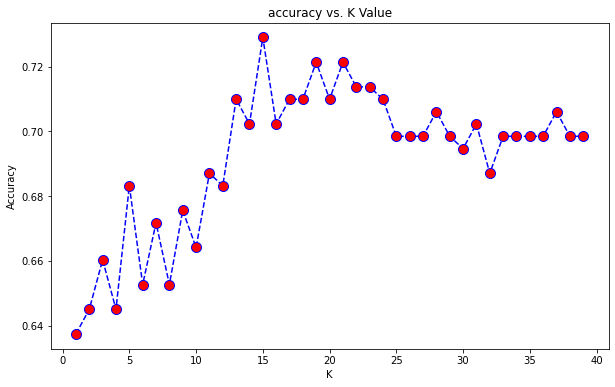

In [98]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Duration: 0:00:00.079977


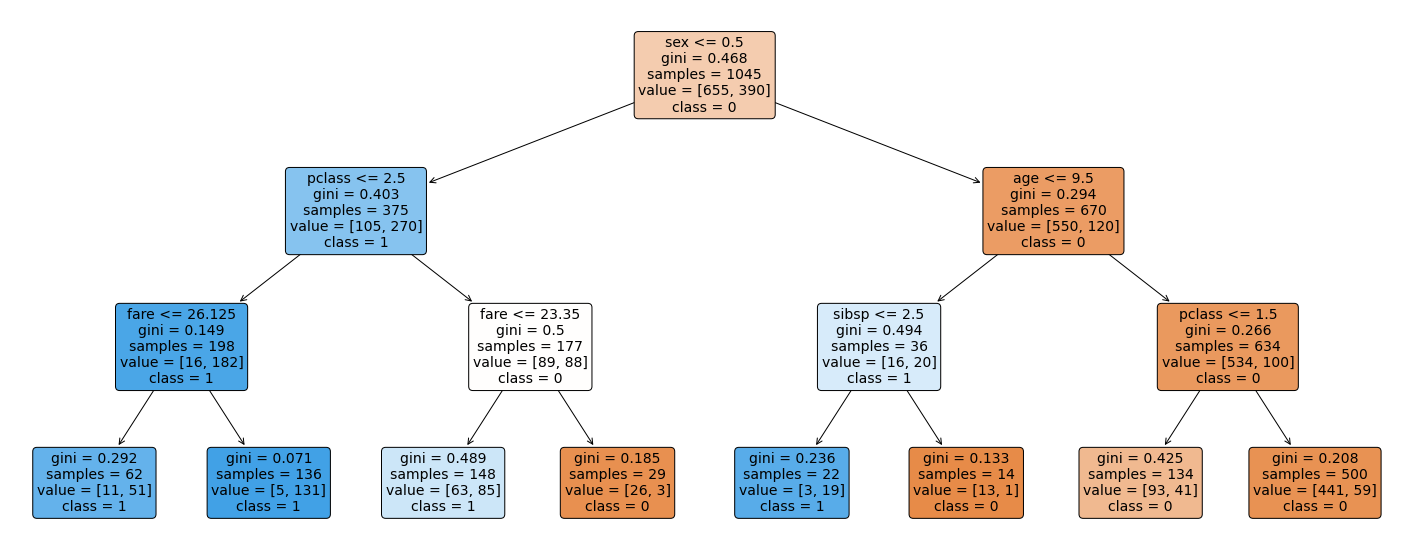

In [53]:
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

start_time = datetime.now()
treemodel = DecisionTreeClassifier(max_depth=3)
treemodel.fit(x_train,y_train)
plt.figure(figsize=(25,10))
plot=plot_tree(treemodel,feature_names=x.columns.values.tolist(),class_names=['0','1'],
                    filled=True,rounded=True,fontsize=14)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [55]:
y1_pred = treemodel.predict(x_test)

In [72]:
accuracy_score(y_test, y1_pred)

0.7938931297709924

In [73]:
precision_score(y_test, y1_pred)

0.8

In [74]:
recall_score(y_test, y1_pred)

0.6666666666666666

In [75]:
mean_squared_error(y_test, y1_pred)

0.20610687022900764

In [64]:
#RF
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)

In [65]:
accuracy_score(y_test, rf_pred)

0.7824427480916031

In [70]:
precision_score(y_test, rf_pred)

0.7741935483870968

In [71]:
recall_score(y_test, rf_pred)

0.6666666666666666

In [68]:
mean_squared_error(y_test, rf_pred)

0.21755725190839695

In [79]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y2_pred = gbk.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

80.92


In [80]:
precision_score(y_test, y2_pred)

0.8625

In [81]:
recall_score(y_test, y2_pred)

0.6388888888888888

In [82]:
mean_squared_error(y_test, y2_pred)

0.19083969465648856